# UFO X-files

Are they exist? Are they between us?
![me](./I-want-to-believe-humor.jpg)

In [232]:
import pandas as pd


# so we import with weak type checking
UFOdata = pd.read_csv( "UFO_sightings.csv", dtype=object)

#print(UFOdata.columns)

# Make column's names more descriptive
UFOdata.rename(columns={'datetime': 'event_date', 'duration (seconds)': 'duration_s',
                       'duration (hours/min)': 'duration_hm', 'date posted': 'post_date',
                       'longitude ': 'longitude'}, inplace=True)

# parse string as datatime 
# UFOdata['event_date_parsed'] =  pd.to_datetime(UFOdata['event_date'], format='%m/%d/%Y %H:%M', errors='coerce')
# df_filtered = UFOdata[(UFOdata.event_date_parsed.isna())]
# ups we have 24:00 hrs invalid format we need fix it




I detected wrong datatime format, string '10/11/2006 24:00' should be '10/12/2006 00:00'
There is a fix

In [233]:
import datetime as dt
import re


# fix for wrong hrs format 
exp  = re.compile('24:00$')
def convert_24hrs(date_str):
    if exp.search(date_str) :
        date_str = re.sub(exp, '00:00', date_str)
        return pd.to_datetime(date_str, format='%m/%d/%Y %H:%M', errors='raise') + dt.timedelta(days=1)   
    return pd.to_datetime(date_str, format='%m/%d/%Y %H:%M', errors='raise')


#print(convert_24hrs('10/11/2006 24:00'))
#print(convert_24hrs('10/11/2005 14:00'))

UFOdata['event_date'] = UFOdata.event_date.apply(convert_24hrs)

## How ofen we get visited

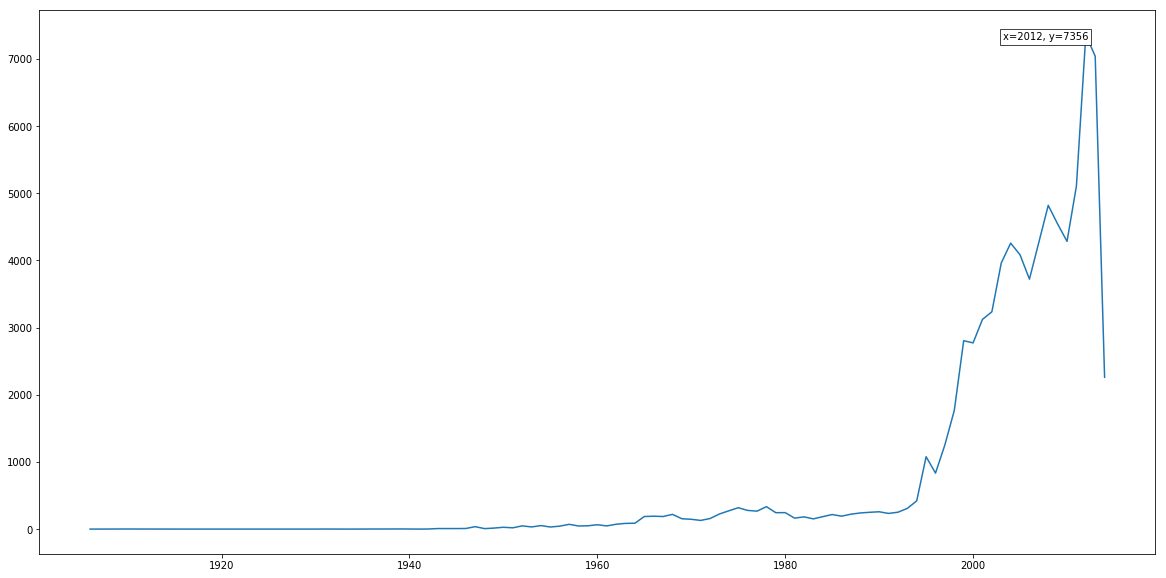

In [234]:
import matplotlib.pyplot as plt
# stolen shamelessly from https://stackoverflow.com/questions/43374920/how-to-automatically-annotate-maximum-value-in-pyplot

per_year = UFOdata.groupby(UFOdata.event_date.dt.year)['city'].count()


x = per_year.index.get_values()
y = per_year.values

fig, ax = plt.subplots(figsize=(20,10))
ax.plot(x,y)

def annot_max(x,y, ax=None):
    xmax = x[np.argmax(y)]
    ymax = y.max()
    text= "x={}, y={}".format(xmax, ymax)
    if not ax:
        ax=plt.gca()
    bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
    arrowprops=dict(arrowstyle="->",connectionstyle="angle,angleA=0,angleB=60")
    kw = dict(xycoords='data',textcoords="axes fraction",
              arrowprops=arrowprops, bbox=bbox_props, ha="right", va="top")
    ax.annotate(text, xy=(xmax, ymax), xytext=(0.94,0.96), **kw)

annot_max(x,y)


plt.show()


Since first report from 1906 UFO sightings rate slowly increased, but from mid 90's dramatically raise to reach peak in 2012 with 7356 events. Later rate dropped.  

In [235]:
UFOdata['longitude'] = pd.to_numeric(UFOdata['longitude'],errors='raise')
UFOdata.loc[UFOdata['latitude'].str.contains('33q.200088'), 'latitude'] = '33.200088'
UFOdata['latitude'] = pd.to_numeric(UFOdata['latitude'],errors='raise')

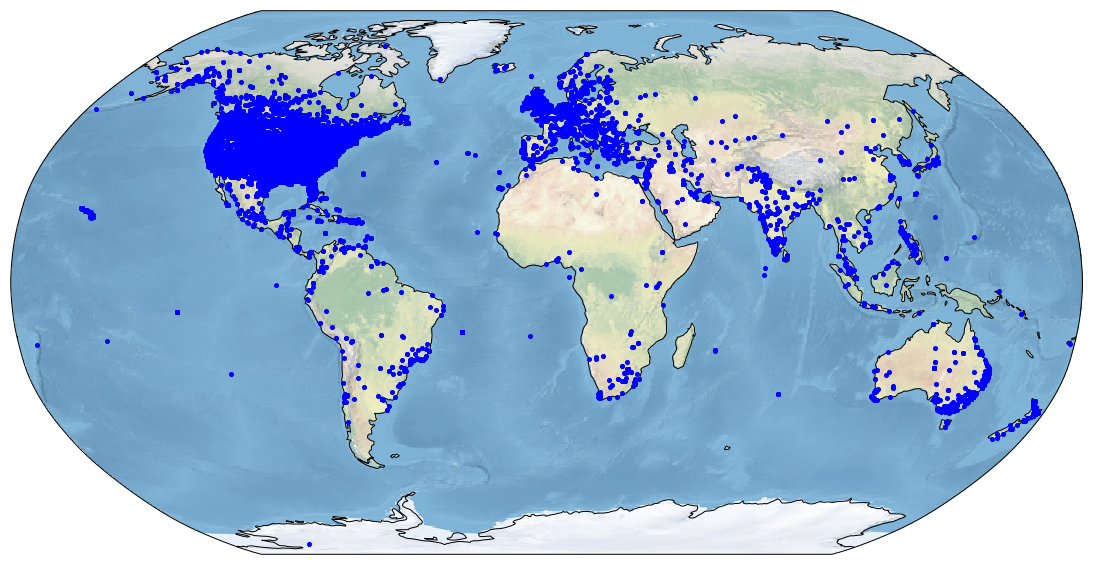

In [255]:
import matplotlib.pyplot as plt

import cartopy.crs as ccrs

def event_locations():  
    return UFOdata[['longitude', 'latitude']].values

def where():
    fig = plt.figure(figsize=(20, 10))
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson())

    # make the map global rather than have it zoom in to
    # the extents of any plotted data
    ax.set_global()

    ax.stock_img()
    ax.coastlines()
    xs, ys = event_locations().T
    
    ax.plot(xs, ys, transform=ccrs.Geodetic(),
            marker='o', color='blue', markersize=4, linestyle='')
    #ax.plot(-19.613333, 63.62, marker='o', color='red', markersize=12,
    #        alpha=0.7, transform=ccrs.Geodetic())

    
    plt.show()


where()

Well, we can conclude UFO loves USA, or at least developed coutries. 
Why, that is question. May be they likes MacDonads.

In [237]:

# so we have dataset clean
#print(UFOdata.describe())
#per_country = UFOdata.astype(str).groupby('country').size()
#print(per_country.head())
#%matplotlib inline
#per_country.plot(kind='bar');
#per_year = UFOdata.groupby(UFOdata.event_date_parsed.dt.year).size()

#print(per_year.describe())
#print(per_year.head())
#print(per_year.describe())
#print(per_year.head())